# Predicting Boston Housing Prices

In this project, I will evaluate the performance of a model that has been trained and tested on data collected from homes in the suburbs of Boston, Massachusetts. The purpose of this model is to make predictions about the value of a home.The data set for this project came from the UCI Machine Learning Repository. Boston housing data was collected in 1978 and each of the 506 entries represents aggregate data on 14 characteristics for homes in various suburbs in Boston, Massachusetts.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import math
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy import percentile

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
boston = datasets.load_boston()
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = pd.DataFrame(boston.target)

# Variables
print("Boston housing dataset has {} data points with {} variables each.".format(*df_boston.shape))

Boston housing dataset has 506 data points with 14 variables each.


## Data description

The objective is to carry out a preliminary analysis of the data by means of graphs, tables, position and dispersion measures. This analysis has a knowledge to extract from the data.

The main objective of this project is to create a machine learning model capable of predicting the value of a home based on some variables. For this we will need to separate our database into dependent variables and independent variable. The variables 'RM', 'LSTAT' and 'PTRATIO' inform us quantitative information and the target or independent variable 'MEDV', will be the variable that we will predict.

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

b: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

price: median value of owner-occupied homes in $1000s, target or independent variable, will be predict

## Explore data

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# data types of columns
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [6]:
# Check missing value
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Prepare Dataset for Modeling

In [7]:
# First replace the 0 values with np.nan values
df_boston.replace(0, np.nan, inplace=True)

In [8]:
# Check what percentage of each column's data is missing
df_boston.isnull().sum()/len(df_boston)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
PRICE      0.000000
dtype: float64

In [9]:
# Drop ZN and CHAS with too many missing columns
df_boston = df_boston.drop('ZN', axis=1)
df_boston = df_boston.drop('CHAS', axis=1)

## Descriptive Statistics

In this section we will calculate the descriptive statistics: minimum, maximum, average, median and the standard deviation of 'PRICE', which is stored in prices.

In [10]:
# Descriptive statistics
df_boston.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Minimum price
#minimum_price = np.min(prices)
minimum_price = df_boston['PRICE'].min()
# Maximum price
maximum_price = df_boston['PRICE'].max()
# Mean price
mean_price = df_boston['PRICE'].mean()
# Median price
median_price = df_boston['PRICE'].median()
# Standard deviation of prices
std_price = df_boston['PRICE'].std()
# Print the calculated statistics
print()
print("Descriptive Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))


Descriptive Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.20


## Histogram 

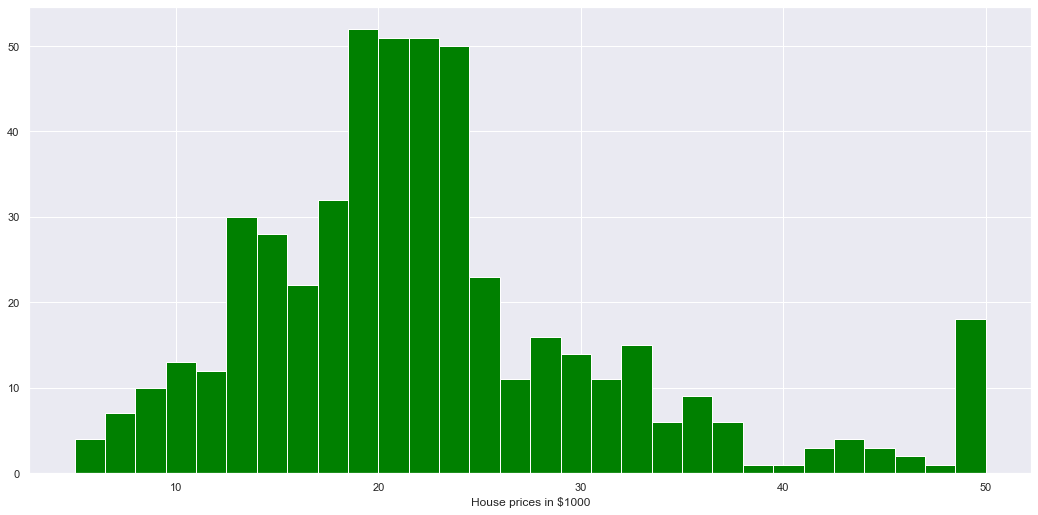

In [12]:
sns.set(rc={'figure.figsize':(16,8)})
plt.hist(df_boston['PRICE'],color ="green", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

## Check Multicollinearity

In [13]:
# Steps to remove redundant values
mask = np.zeros_like(df_boston.corr())
mask[np.triu_indices_from(mask)] = True

## Correlation Matrix

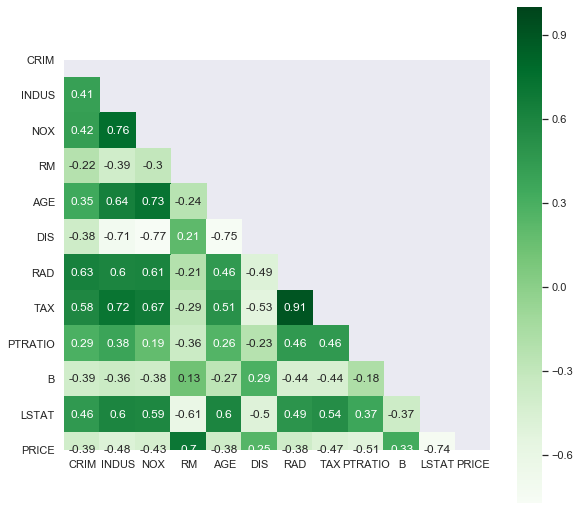

In [14]:
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df_boston.corr().round(2), square=True, cmap='Greens', annot=True, mask=mask);

In my heatmap analysis I defined a high correlation cut to + - 0.75.
- TAX and RAD have a correlation of 0.91
- NOX and INDUS have a correlation of 0.76
- DIS and NOX have a correlation of -0.77
- PRICE correlates with RM and LSTAT 0.7 and -0.74

In [15]:
# drop correlated values
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS']
df_boston = df_boston.drop(columns=columns)

## Scatterplots

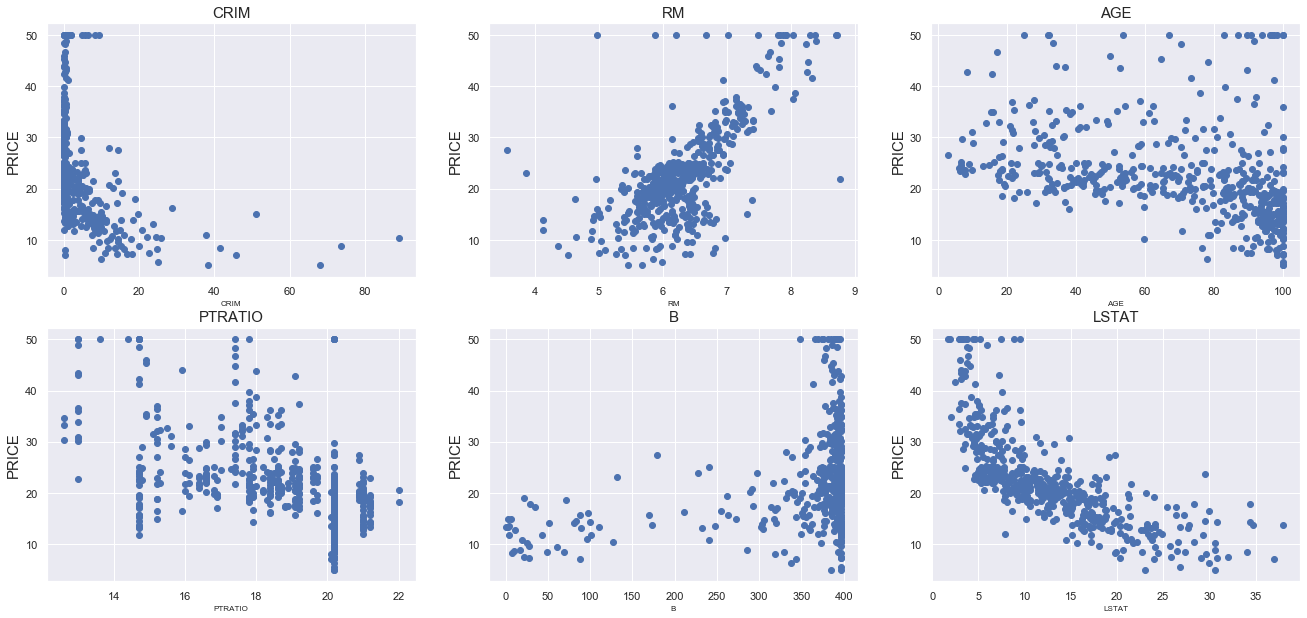

In [16]:
plt.figure(figsize=(20,20))  
features = df_boston.drop('PRICE', 1).columns
target = df_boston['PRICE']
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df_boston[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('PRICE', fontsize=15)  

## Linear Relationships

After analyzing the graphs, we can clearly see that the variables LSTAT and RM, present some type of linear relationship.

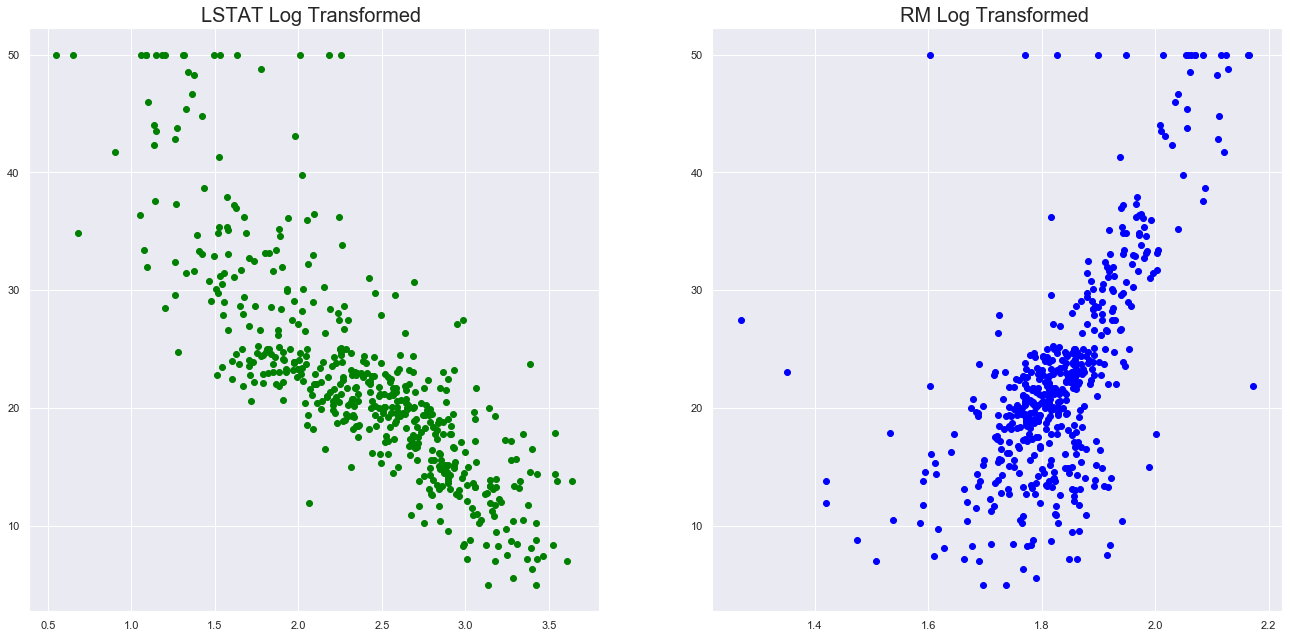

In [17]:
# Log Transformation

# LSTAT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df_boston["LOGLSTAT"] = df_boston["LSTAT"].apply(np.log)
plt.scatter(df_boston["LOGLSTAT"], df_boston['PRICE'], color='green')
plt.title('LSTAT Log Transformed ', fontsize= 20)

# RM
plt.subplot(1,2,2)
df_boston["LOGRM"] = df_boston["RM"].apply(np.log)
plt.scatter(df_boston["LOGRM"], df_boston['PRICE'], color='BLUE')
plt.title('RM Log Transformed ', fontsize= 20)
plt.show()

In [18]:
# Separate target
X = df_boston[['LOGLSTAT', 'RM']]
y = df_boston['PRICE']

## Shuffle and Split Data

In [19]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 10)

## Create Model

In [20]:
# Create LinearRegression Instance
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted = lrm.predict(X_test)

## Testing the Model

In [21]:
r2 = lrm.score(X_test, y_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 5.214330262011093
R2 score is 0.7155988559379332


## Coefficients

In [22]:
# coefficient
coeff = list(zip(X, lrm.coef_))

# print coefficients
print(['y-intercept = {}'.format(lrm.intercept_), sorted(coeff, key = lambda x: x[1])])

['y-intercept = 25.77607508783121', [('LOGLSTAT', -9.968206663480508), ('RM', 3.231085381986443)]]
